**Model Building-Deep Learning

DNN (Deep Neural Networks),CNN

In [1]:
%pip install tensorflow --upgrade keras-tuner statsmodels pandas numpy scikit-learn

  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import shutil, os, json
import matplotlib.pyplot as plt
from tensorflow import keras, tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, layers, regularizers
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import SGD

# Load data
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separate features and target variable
X_train = train_data.drop(columns=['Social_Anxiety_Category'])
y_train = train_data['Social_Anxiety_Category']
X_val = val_data.drop(columns=['Social_Anxiety_Category'])
y_val = val_data['Social_Anxiety_Category']
X_test = test_data.drop(columns=['Social_Anxiety_Category'])
y_test = test_data['Social_Anxiety_Category']

# Label encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

# One-hot encoding the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape the data for deep learning models (e.g., CNN, LSTM)
# For DNN, reshape it to be 2D: (samples, features)
X_train_dnn = X_train
X_val_dnn = X_val
X_test_dnn = X_test

# Reshape the data for 1D CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # (samples, features, channels)
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [5]:
# ---------------------- Model Performance Evaluation ----------------------

def evaluate_deep_learning_model(model, model_name, x_train, y_train, x_test, y_test, history=None):
    # Model summary
    print(f"\n{'='*40}\n{' '*10}{model_name} Model Summary\n{'='*40}")
    model.summary()

    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print(f"\n{'='*40}\nTest Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}\n")

    # ------------------- Classification Report -------------------
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices
    y_true = np.argmax(y_test, axis=1)

    classificationreport = classification_report(y_true, y_pred_classes, output_dict=True)
    report_df = pd.DataFrame(classificationreport).transpose()

    print("\nClassification Report:")
    display(report_df.round(2))

    # ------------------- Confusion Matrix -------------------
    confusionmatrix = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusionmatrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})
    plt.title(f'{model_name} - Confusion Matrix', fontsize=16, pad=20)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    # ------------------- Accuracy and Loss Plot -------------------
    if history:
        plt.figure(figsize=(12, 6))

        # Accuracy plot
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
        plt.title(f'{model_name} - Accuracy', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Loss plot
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
        plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
        plt.title(f'{model_name} - Loss', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Loss', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

    return test_accuracy, test_loss, classificationreport, confusionmatrix


1.Deep Neural Network (DNN)

c:\Users\lxy03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 70s 21ms/step - accuracy: 0.8701 - loss: 0.2762 - val_accuracy: 0.9197 - val_loss: 0.1488
Epoch 2/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 68s 21ms/step - accuracy: 0.9175 - loss: 0.1570 - val_accuracy: 0.9204 - val_loss: 0.1456
Epoch 3/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 77s 20ms/step - accuracy: 0.9200 - loss: 0.1493 - val_accuracy: 0.9215 - val_loss: 0.1456
Epoch 4/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 66s 20ms/step - accuracy: 0.9210 - loss: 0.1460 - val_accuracy: 0.9256 - val_loss: 0.1324
Epoch 5/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 69s 22ms/step - accuracy: 0.9214 - loss: 0.1430 - val_accuracy: 0.9263 - val_loss: 0.1366
Epoch 6/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 72s 22ms/step - accuracy: 0.9227 - loss: 0.1415 - val_accuracy: 0.9243 - val_loss: 0.1365
Epoch 7/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 59s 19ms/step - accuracy: 0.9238 - loss: 0.1394 - val_accuracy: 0.9256 - val_loss: 0.1348

          DNN Model Model Summary


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │        15,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,016,779 (7.69 MB)

 Trainable params: 672,259 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,344,520 (5.13 MB)

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9266 - loss: 0.1322

Test Loss: 0.1339
Test Accuracy: 0.9250

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step

Classification Report:


,precision,recall,f1-score,support
0,1.00,1.00,1.00,20338.00
1,0.82,0.97,0.89,20759.00
2,0.97,0.84,0.90,27087.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.93,0.93,68184.00
weighted avg,0.93,0.93,0.93,68184.00


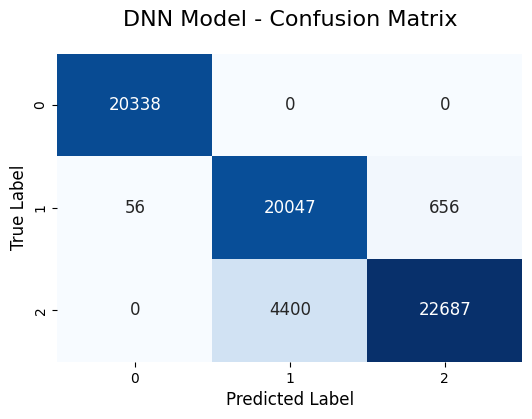

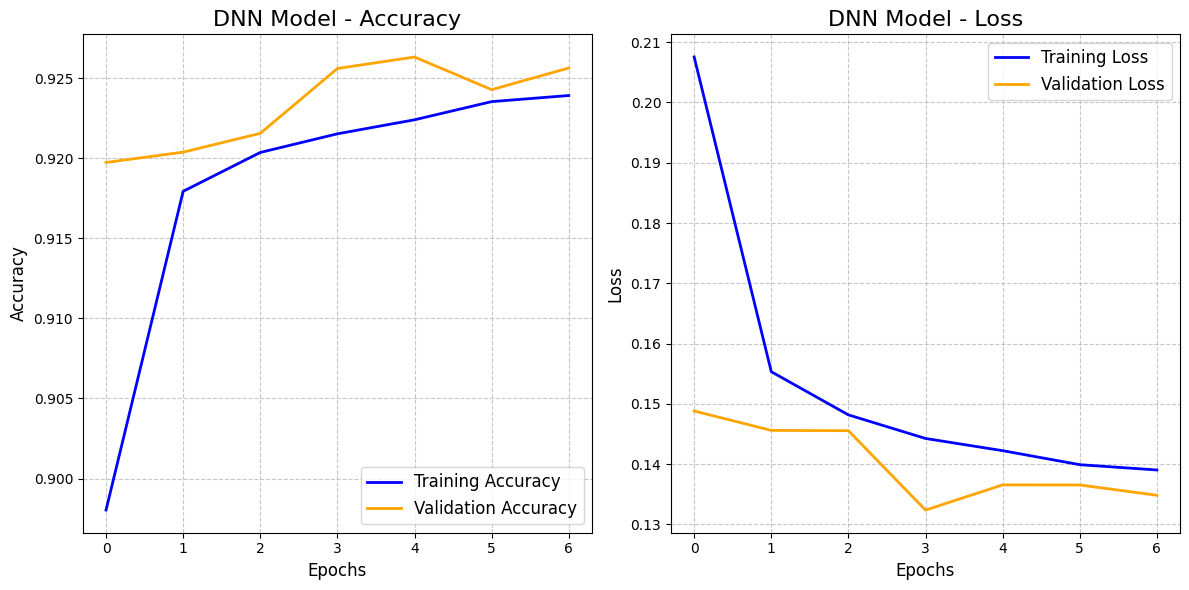

In [4]:
def build_dnn():
    model = keras.Sequential([
        layers.Flatten(input_shape=X_train_dnn.shape[1:]),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# DNN Model
dnn_model = build_dnn()
history_dnn = dnn_model.fit(X_train_dnn, y_train, batch_size=64, epochs=20, 
                            validation_data=(X_val_dnn, y_val), shuffle=True, 
                            callbacks=[early_stopping])

dnn_accuracy, dnn_loss, dnn_classificationreport, dnn_confusionmatrix = evaluate_deep_learning_model(
    dnn_model, "DNN Model", X_train_dnn, y_train, X_test_dnn, y_test, history_dnn)



Trial 60 Complete [00h 19m 21s]
val_accuracy: 0.9237346649169922

Best val_accuracy So Far: 0.9284865856170654
Total elapsed time: 05h 52m 17s
Epoch 1/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 67s 21ms/step - accuracy: 0.9248 - loss: 0.1668 - val_accuracy: 0.9288 - val_loss: 0.1557
Epoch 2/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 66s 20ms/step - accuracy: 0.9266 - loss: 0.1635 - val_accuracy: 0.9292 - val_loss: 0.1565
Epoch 3/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 73s 23ms/step - accuracy: 0.9257 - loss: 0.1630 - val_accuracy: 0.9292 - val_loss: 0.1542
Epoch 4/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 69s 22ms/step - accuracy: 0.9256 - loss: 0.1624 - val_accuracy: 0.9293 - val_loss: 0.1534
Epoch 5/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 67s 21ms/step - accuracy: 0.9264 - loss: 0.1593 - val_accuracy: 0.9283 - val_loss: 0.1534
Epoch 6/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 69s 22ms/step - accuracy: 0.9275 - loss: 0.1578 - val_accuracy: 0.9275 - val_loss: 0.1539
Epoch 7/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 71s 22ms/step - accurac

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 640)            │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 384)            │       246,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,824 (2.33 MB)

 Trainable params: 305,411 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 305,413 (1.17 MB)

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9294 - loss: 0.1449

Test Loss: 0.1467
Test Accuracy: 0.9276

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step

Classification Report:


,precision,recall,f1-score,support
0,1.00,1.00,1.00,20338.00
1,0.81,0.99,0.89,20759.00
2,0.99,0.82,0.90,27087.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.94,0.93,68184.00
weighted avg,0.94,0.93,0.93,68184.00


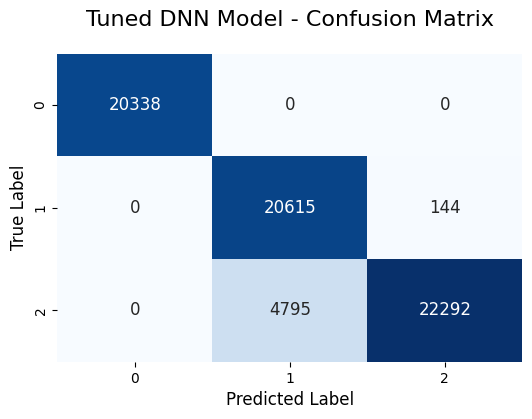

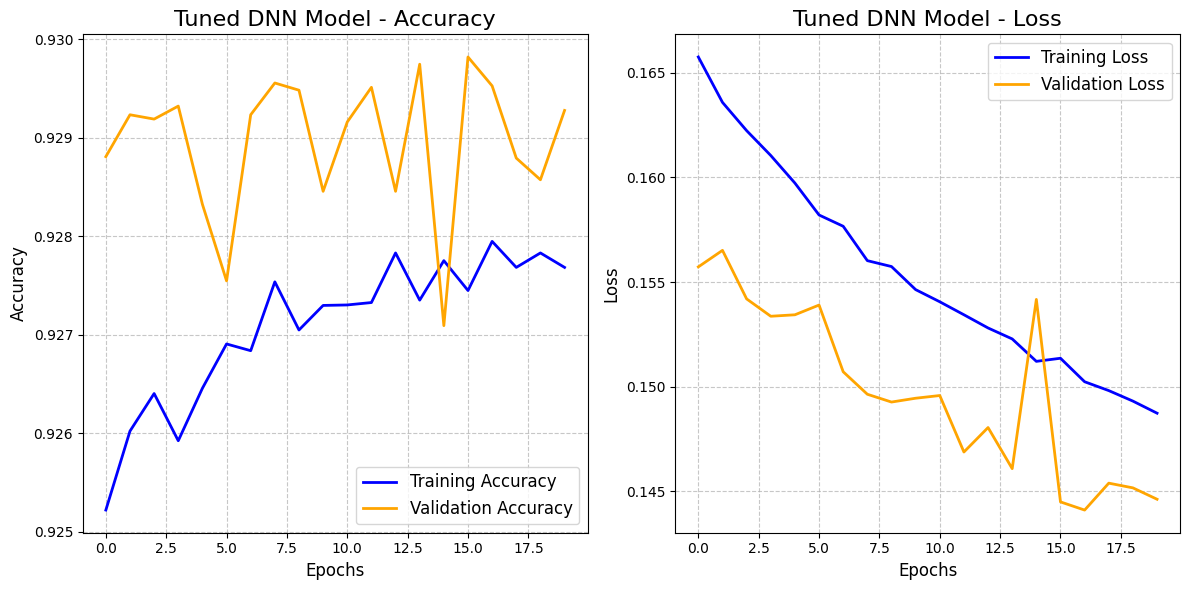


=== Best Hyperparameters #1 ===
num_layers: 3
units_0: 640
dropout_0: 0.2
l2_reg_0: 1.4462145785911854e-05
learning_rate: 0.0063448376059836616
momentum: 0.7

=== Best Hyperparameters #2 ===
num_layers: 3
units_0: 384
dropout_0: 0.4
l2_reg_0: 1.724256804442743e-05
learning_rate: 0.0025446456816680557
momentum: 0.8999999999999999

=== Best Hyperparameters #3 ===
num_layers: 3
units_0: 768
dropout_0: 0.2
l2_reg_0: 2.096548803689102e-05
learning_rate: 0.0035245953027781677
momentum: 0.7999999999999999

DNN best hyperparameters saved.


In [5]:
import shutil, os, json
import pandas as pd
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import tensorflow as tf

# Remove previous tuning directory
if os.path.exists('dnn_tuning/dnn_tuning_project'):
    shutil.rmtree('dnn_tuning/dnn_tuning_project')

# Define DNN model
def build_tuned_dnn_model(hp):
    model = Sequential()
    model.add(layers.Flatten(input_shape=X_train_dnn.shape[1:]))

    num_layers = hp.Int('num_layers', 1, 3)
    for i in range(num_layers):
        model.add(layers.Dense(
            hp.Int(f'units_{i}', 128, 1024, step=128),
            activation='relu',
            kernel_regularizer=regularizers.l2(
                hp.Float(f'l2_reg_{i}', 1e-5, 1e-2, sampling='log')
            )
        ))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    model.add(layers.Dense(num_classes, activation='softmax'))

    optimizer = SGD(
        learning_rate=hp.Float('learning_rate', 0.001, 0.01, sampling='log'),
        momentum=hp.Float('momentum', 0.7, 0.9, step=0.1)
    )

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Setup tuner
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
tuner_dnn = kt.Hyperband(build_tuned_dnn_model, objective='val_accuracy',
                         max_epochs=10, hyperband_iterations=2,
                         directory='dnn_tuning', project_name='dnn_tuning_project')

# Run search
tuner_dnn.search(X_train_dnn, y_train, epochs=10, validation_data=(X_val_dnn, y_val), callbacks=[early_stopping])

# Get and retrain the best model
best_dnn_model = tuner_dnn.get_best_models(num_models=1)[0]
history_dnn_tuned = best_dnn_model.fit(X_train_dnn, y_train, batch_size=64, epochs=20,
                                       validation_data=(X_val_dnn, y_val), shuffle=True, callbacks=[early_stopping])

# Evaluate
dnntuned_accuracy, dnntuned_loss, dnntuned_classificationreport, dnntuned_confusionmatrix = evaluate_deep_learning_model(
    best_dnn_model, "Tuned DNN Model", X_train_dnn, y_train, X_test_dnn, y_test, history_dnn_tuned
)

# Extract and save the top hyperparameter sets
top_trials = tuner_dnn.oracle.get_best_trials(num_trials=3)
os.makedirs('hyperparameter_results', exist_ok=True)

final_best_params = {}
for i, trial in enumerate(top_trials):
    print(f"\n=== Best Hyperparameters #{i+1} ===")
    hps = trial.hyperparameters
    best_params = {
        'num_layers': hps.get('num_layers'),
        'units_0': hps.get('units_0'),
        'dropout_0': hps.get('dropout_0'),
        'l2_reg_0': hps.get('l2_reg_0'),
        'learning_rate': hps.get('learning_rate'),
        'momentum': hps.get('momentum')
    }
    for param, value in best_params.items():
        print(f"{param}: {value}")

    with open(f'hyperparameter_results/dnn_best_parameters_{i+1}.json', 'w') as f:
        json.dump(best_params, f, indent=4)

    if i == 0:
        final_best_params = best_params

# Save the overall best
with open('hyperparameter_results/dnn_best_parameters.json', 'w') as f:
    json.dump(final_best_params, f, indent=4)

print("\nDNN best hyperparameters saved.")
tf.keras.backend.clear_session()

In [6]:
import joblib
joblib.dump(best_dnn_model, 'best_dnn_model.pkl')

print("Model exported successfully as 'best_dnn_model.pkl'.")

Model exported successfully as 'best_dnn_model.pkl'.


2.Convolutional Neural Network (CNN)

c:\Users\lxy03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8075 - loss: 0.7577 - val_accuracy: 0.9251 - val_loss: 0.1954
Epoch 2/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9221 - loss: 0.1880 - val_accuracy: 0.9228 - val_loss: 0.1717
Epoch 3/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9242 - loss: 0.1577 - val_accuracy: 0.9262 - val_loss: 0.1515
Epoch 4/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9237 - loss: 0.1504 - val_accuracy: 0.9252 - val_loss: 0.1421
Epoch 5/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9252 - loss: 0.1447 - val_accuracy: 0.9280 - val_loss: 0.1365
Epoch 6/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9239 - loss: 0.1443 - val_accuracy: 0.9254 - val_loss: 0.1427
Epoch 7/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9265 - loss: 0.1394 - val_accuracy: 0.9270 - val_loss: 0.1367
Epoch 8/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9263 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,067 (1.01 MB)

 Trainable params: 88,355 (345.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,712 (690.29 KB)

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9295 - loss: 0.1326

Test Loss: 0.1342
Test Accuracy: 0.9272

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step

Classification Report:


,precision,recall,f1-score,support
0,1.00,1.00,1.00,20338.00
1,0.81,1.00,0.89,20759.00
2,1.00,0.82,0.90,27087.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.94,0.94,0.93,68184.00
weighted avg,0.94,0.93,0.93,68184.00


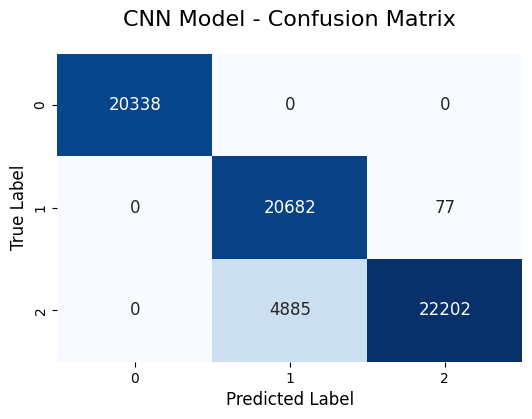

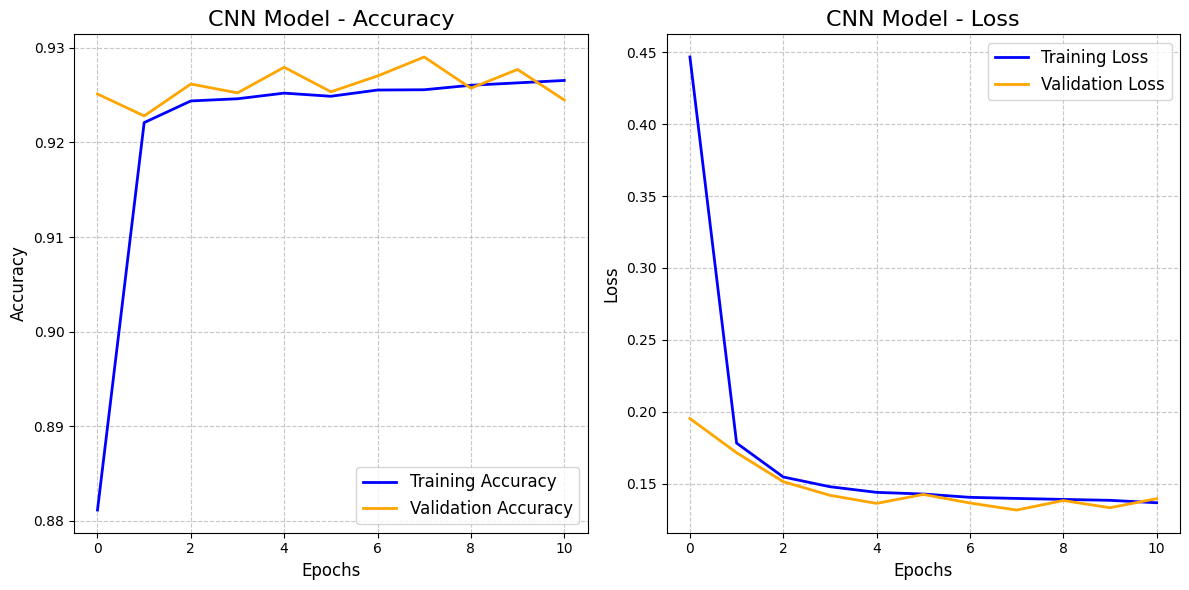

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the CNN Model
def build_cnn_model():
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape=(X_train_cnn.shape[1], 1),
                     kernel_initializer='he_normal', kernel_regularizer='l2'))  # First Conv1D layer
    model.add(MaxPooling1D(2, padding='same'))  # Use padding='same' here

    model.add(Conv1D(64, 2, activation='relu'))  # Second Conv1D layer
    model.add(MaxPooling1D(2, padding='same'))  # Again, padding='same'

    model.add(Conv1D(128, 2, activation='relu'))  # Third Conv1D layer
    model.add(MaxPooling1D(2, padding='same'))  # And here too

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 output classes

    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Initialize the model
cnn_model = build_cnn_model()

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, batch_size=64, epochs=20,
                            validation_data=(X_val_cnn, y_val), shuffle=True,
                            callbacks=[early_stopping])

# Evaluate the model
cnn_accuracy, cnn_loss, cnn_classificationreport, cnn_confusionmatrix = evaluate_deep_learning_model(
    cnn_model, "CNN Model", X_train_cnn, y_train, X_test_cnn, y_test, history_cnn
)


Trial 60 Complete [02h 07m 23s]
val_accuracy: 0.9286478757858276

Best val_accuracy So Far: 0.9295718669891357
Total elapsed time: 20h 53m 23s
Epoch 1/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 555s 172ms/step - accuracy: 0.9262 - loss: 0.1370 - val_accuracy: 0.9262 - val_loss: 0.1357
Epoch 2/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 520s 163ms/step - accuracy: 0.9278 - loss: 0.1340 - val_accuracy: 0.9275 - val_loss: 0.1309
Epoch 3/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 501s 157ms/step - accuracy: 0.9269 - loss: 0.1342 - val_accuracy: 0.9269 - val_loss: 0.1307
Epoch 4/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 631s 197ms/step - accuracy: 0.9257 - loss: 0.1344 - val_accuracy: 0.9257 - val_loss: 0.1342
Epoch 5/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 825s 258ms/step - accuracy: 0.9281 - loss: 0.1337 - val_accuracy: 0.9293 - val_loss: 0.1289
Epoch 6/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 850s 266ms/step - accuracy: 0.9288 - loss: 0.1324 - val_accuracy: 0.9289 - val_loss: 0.1284
Epoch 7/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 851s 266ms/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 14, 96)         │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 96)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 64)          │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 384)         │        49,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 384)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,955 (1.92 MB)

 Trainable params: 167,651 (654.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,304 (1.28 MB)

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 323s 151ms/step - accuracy: 0.9299 - loss: 0.1286

Test Loss: 0.1304
Test Accuracy: 0.9280

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 307s 144ms/step

Classification Report:


,precision,recall,f1-score,support
0,1.00,1.00,1.00,20338.00
1,0.82,0.98,0.89,20759.00
2,0.98,0.83,0.90,27087.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.94,0.93,68184.00
weighted avg,0.94,0.93,0.93,68184.00


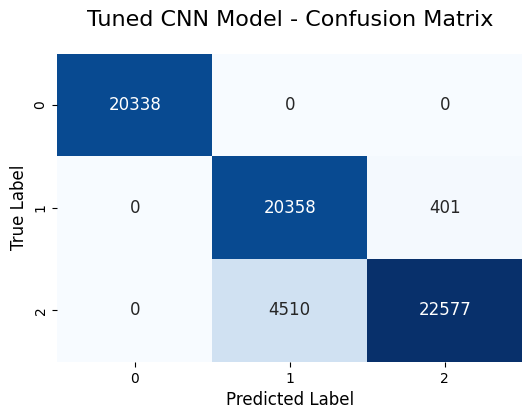

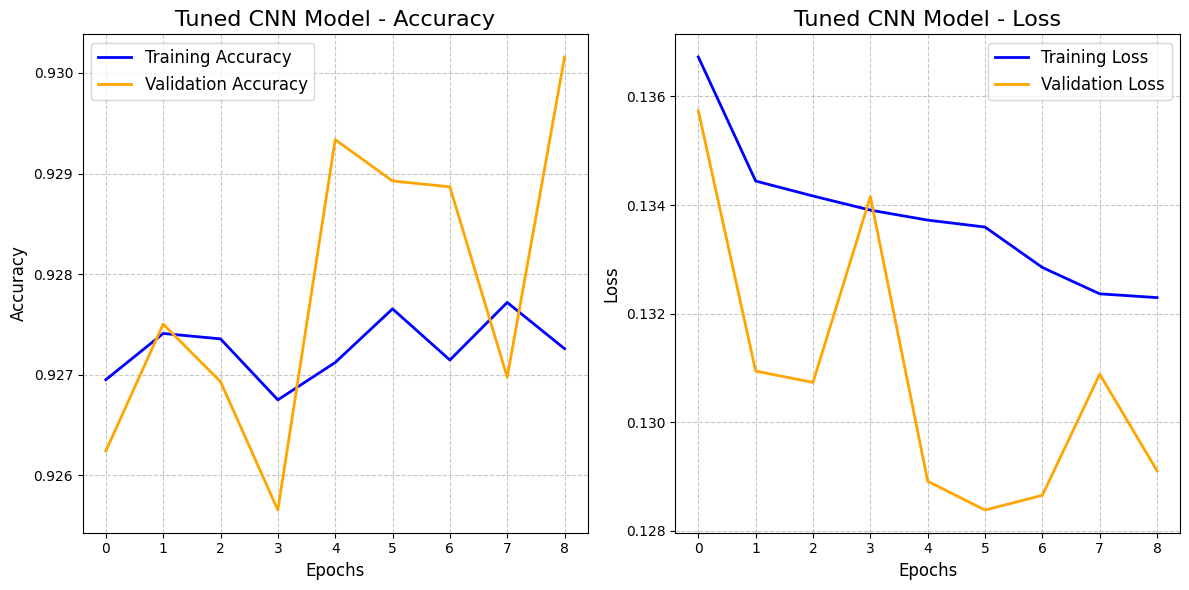


=== Best Hyperparameters #1 ===
dropout_rate: 0.3
learning_rate: 0.0008927307046179131
dense_units: 256
filters_1: 96
kernel_size_1: 2

=== Best Hyperparameters #2 ===
dropout_rate: 0.3
learning_rate: 0.0014419497855851235
dense_units: 384
filters_1: 96
kernel_size_1: 4

=== Best Hyperparameters #3 ===
dropout_rate: 0.6000000000000001
learning_rate: 0.00042165826208115294
dense_units: 512
filters_1: 32
kernel_size_1: 2

CNN best hyperparameters saved.


In [6]:
import os
import shutil
import stat
import json
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import tensorflow as tf

# ----------------------------------------
# 1) Robustly remove any previous tuning directory
# ----------------------------------------
def _handle_remove_readonly(func, path, exc_info):
    # Clear read-only flag and retry
    os.chmod(path, stat.S_IWRITE)
    func(path)

tuning_root = 'cnn_tuning'
tuning_project = os.path.join(tuning_root, 'cnn_tuning_project')

if os.path.exists(tuning_root):
    shutil.rmtree(tuning_root, onerror=_handle_remove_readonly)

# ----------------------------------------
# 2) Define CNN model builder for Keras Tuner
# ----------------------------------------
def build_cnn_model(hp):
    model = Sequential()
    max_kernel_size = min(4, X_train_cnn.shape[1])

    # First conv block
    model.add(Conv1D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Int('kernel_size_1', min_value=2, max_value=max_kernel_size, step=1),
        activation='relu',
        input_shape=(X_train_cnn.shape[1], 1),
        kernel_initializer='he_normal',
        kernel_regularizer='l2',
        padding='same'
    ))
    model.add(MaxPooling1D(pool_size=2))

    # Second conv block
    model.add(Conv1D(
        filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
        kernel_size=hp.Int('kernel_size_2', min_value=2, max_value=max_kernel_size, step=1),
        activation='relu',
        padding='same'
    ))
    model.add(MaxPooling1D(pool_size=2))

    # Third conv block
    model.add(Conv1D(
        filters=hp.Int('filters_3', min_value=128, max_value=512, step=128),
        kernel_size=hp.Int('kernel_size_3', min_value=2, max_value=max_kernel_size, step=1),
        activation='relu',
        padding='same'
    ))
    model.add(MaxPooling1D(pool_size=2))

    # Classification head
    model.add(Flatten())
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)))
    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))
    model.add(Dense(3, activation='softmax'))  # 3 classes

    # Compile
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        metrics=['accuracy']
    )
    return model

# ----------------------------------------
# 3) Early stopping callback
# ----------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# ----------------------------------------
# 4) Set up the Hyperband tuner
# ----------------------------------------
tuner_cnn = kt.Hyperband(
    build_cnn_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory=tuning_root,
    project_name='cnn_tuning_project',
    overwrite=True    # ensure any leftover gets nuked
)

# ----------------------------------------
# 5) Run the hyperparameter search
# ----------------------------------------
tuner_cnn.search(
    X_train_cnn,
    y_train,
    epochs=10,
    validation_data=(X_val_cnn, y_val),
    callbacks=[early_stopping]
)

# ----------------------------------------
# 6) Retrieve and retrain the best model
# ----------------------------------------
best_cnn_model = tuner_cnn.get_best_models(num_models=1)[0]
history_cnn_tuned = best_cnn_model.fit(
    X_train_cnn,
    y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_val_cnn, y_val),
    shuffle=True,
    callbacks=[early_stopping]
)

# ----------------------------------------
# 7) Evaluate
#    (assuming evaluate_deep_learning_model returns: accuracy, loss, report, matrix)
# ----------------------------------------
cnntuned_accuracy, cnntuned_loss, cnntuned_classificationreport, cnntuned_confusionmatrix = evaluate_deep_learning_model(
    best_cnn_model,
    "Tuned CNN Model",
    X_train_cnn,
    y_train,
    X_test_cnn,
    y_test,
    history_cnn_tuned
)

# ----------------------------------------
# 8) Extract and save the top 3 trials’ hyperparameters
# ----------------------------------------
top_trials = tuner_cnn.oracle.get_best_trials(num_trials=3)
os.makedirs('hyperparameter_results', exist_ok=True)
final_best_params = {}

for i, trial in enumerate(top_trials):
    hps = trial.hyperparameters
    best_params = {
        'dropout_rate': hps.get('dropout_rate'),
        'learning_rate': hps.get('learning_rate'),
        'dense_units': hps.get('dense_units'),
        'filters_1': hps.get('filters_1'),
        'kernel_size_1': hps.get('kernel_size_1')
    }
    # Print to console
    print(f"\n=== Best Hyperparameters #{i+1} ===")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    # Save each to its own JSON
    with open(f'hyperparameter_results/cnn_best_parameters_{i+1}.json', 'w') as f:
        json.dump(best_params, f, indent=4)
    if i == 0:
        final_best_params = best_params

# Save the single best set
with open('hyperparameter_results/cnn_best_parameters.json', 'w') as f:
    json.dump(final_best_params, f, indent=4)

print("\nCNN best hyperparameters saved.")

tf.keras.backend.clear_session()


Compare